In [14]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium

!pip install bs4
from bs4 import BeautifulSoup
!pip install geocoder
import geocoder
!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import matplotlib.pyplot as plt # plotting library
# backend for rendering plots within the browser
%matplotlib inline 

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

     |████████████████████████████████| 122kB 3.2MB/s eta 0:00:01
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/a0/b0/b2/4f80b9456b87abedbc0bf2d52235414c3467d8889be38dd472
Successfully built bs4
Solving environment: done

# All requested packages already installed.

Libraries imported.


In [3]:
df_popP = pd.read_csv('PopolazioneParigi.csv')
df_popP

,Arrondissements,Area,Population 2009,Density Kmq
0,1 Arrondissement - Louvre,1824612,17614,9654
1,2 Arrondissement - Bourse,991153,22400,22600
2,3 Arrondissement -Temple,1170882,35655,30451
3,4 Arrondissement - Hotel de Ville,1600585,28192,17614
4,5 Arrondissement - Pantheon,2539374,61531,24231
5,6 Arrondissement - Luxembourg,2153095,43143,20038
6,7 Arrondissement - Palais Bourbon,4090057,57442,14044
7,8 Arrondissement - Elysee,3880036,40278,10381
8,9 Arrondissement - Opera,2178303,60275,27671
9,10 Arrondissement - Entrepot,2891739,95911,33167


In [4]:
paris_geo = r'ParigiArrondissements.geojson'
paris_map = folium.Map(location=[48.86318, 2.33975], zoom_start=12)

paris_map.choropleth(
    geo_data=paris_geo,
    data=df_popP,
    columns=['Arrondissements','Density Kmq'],
    key_on='feature.properties.Arrondissements',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.9,
    line_color='black',
    legend_name='Density of population in Paris'
)

paris_map

In [5]:
df_popR = pd.read_csv('PopolazioneRoma.csv')
df_popR

,Municipio,Area,Population 2009,Density Kmq
0,Municipio Roma 1,20090000,199929,9952
1,Municipio Roma 2,19660000,176030,8954
2,Municipio Roma 3,98030000,202281,2063
3,Municipio Roma 4,98940000,179240,1812
4,Municipio Roma 5,26920000,245977,9137
5,Municipio Roma 6,113880000,236581,2077
6,Municipio Roma 7,45840000,310696,6778
7,Municipio Roma 8,47150000,135717,2878
8,Municipio Roma 9,183310000,174586,952
9,Municipio Roma 10,150740000,221546,1470


In [6]:
roma_geo = r'MunicipiRoma.geojson'
roma_map = folium.Map(location=[41.90322, 12.49564], zoom_start=10)

roma_map.choropleth(
    geo_data=roma_geo,
    data=df_popR,
    columns=['Municipio','Density Kmq'],
    key_on='feature.properties.Municipio',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.9,
    line_color='black',
    legend_name='Density of population in Rome'
)

roma_map

In [7]:
df_greenP = pd.read_csv('SpaziVerdiParigi.csv')
df_greenP

,Arrondissements,Green spaces Mq,Mq for inhabitant
0,1 Arrondissement - Louvre,38.974,2.2
1,2 Arrondissement - Bourse,424.049,18.9
2,3 Arrondissement - Temple,51.195,1.4
3,4 Arrondissement-Hotel de Ville,160.704,5.7
4,5 Arrondissement - Pantheon,342.965,5.5
5,6 Arrondissement - Luxembourg,50.412,1.1
6,7 Arrondissement - Palais Bourbon,263.579,4.5
7,8 Arrondissement - Elysee,205.894,5.1
8,9 Arrondissement - Opera,60.977,1.0
9,10 Arrondissement - Entrepot,1.269.783,13.2


In [211]:
paris_map2 = folium.Map(location=[48.86318, 2.33975], zoom_start=12)

paris_map2.choropleth(
    geo_data=paris_geo,
    data=df_greenP,
    columns=['Arrondissements','Mq for inhabitant'],
    key_on='feature.properties.Arrondissements',
    fill_color='YlGn', 
    fill_opacity=0.7, 
    line_opacity=0.9,
    line_color='black',
    legend_name='Mq for inhabitant'
)

paris_map2

In [9]:
df_greenR = pd.read_csv('SpaziVerdiRoma.csv')
df_greenR

,Municipio,Green spaces Mq,Mq for inhabitant
0,Municipio Roma 1,1.780.286,10.5
1,Municipio Roma 2,3.364.881,20.0
2,Municipio Roma 3,1.597.499,7.8
3,Municipio Roma 4,3.341.632,19.0
4,Municipio Roma 5,2.278.607,9.3
5,Municipio Roma 6,1.633.317,6.3
6,Municipio Roma 7,2.071.086,6.7
7,Municipio Roma 8,1.948.538,14.9
8,Municipio Roma 9,3.865.378,21.1
9,Municipio Roma 10,12.293.230,53.1


In [212]:
roma_map2 = folium.Map(location=[41.90322, 12.49564], zoom_start=10)

roma_map2.choropleth(
    geo_data=roma_geo,
    data=df_greenR,
    columns=['Municipio','Mq for inhabitant'],
    key_on='feature.properties.Municipio',
    fill_color='YlGn', 
    fill_opacity=0.7, 
    line_opacity= 0.9,
    line_color='black',
    legend_name='Mq for inhabitant'
)

roma_map2

In [47]:
df_pollP = pd.read_csv('InquinamentoParigi.csv')
df_pollP

,ID,nom,departement,ville,CP,type,NO2_2012,NO2_2013,NO2_2014,NO2_2015,...,PM10_2016,PM10,PM25_2012,PM25_2013,PM25_2014,PM25_2015,PM25_2016,PM25,Longitude,Latitude
0,0750026W,L'Enseignementparpetitsgroupes(Ecolesecondaire...,75,Paris15,75015,secondaire,41.316912,42.916257,40.610102,37.182711,...,23.077844,21.782889,17.152857,18.637080,14.895546,15.277787,14.806532,13.549347,2.290811,48.842157
1,0750106H,EcoletechnologiqueprivéeCCIPCentredesFormation...,75,Paris20,75020,secondaire,63.683878,60.890328,53.322156,45.804898,...,23.803116,23.020608,22.692531,23.629341,18.628494,16.978740,15.434943,14.429643,2.405807,48.875666
2,0750132L,EcoleprimaireprivéeNotre-Dame-SaintRoch,75,Paris01,75001,primaire,41.507336,41.598420,42.855147,39.286859,...,22.400441,20.867075,16.614189,18.142261,14.487745,14.562495,14.134427,12.561472,2.332706,48.866140
3,0750136R,EcoleprimaireprivéeSaint-Sauveur,75,Paris02,75002,primaire,45.197342,44.280198,45.187931,40.855468,...,23.405547,22.650735,17.713481,19.089383,15.433904,15.067306,14.756645,15.118740,2.347347,48.866889
4,0750138T,EcoleprimaireprivéeSainteGenevièveduMarais,75,Paris03,75003,primaire,40.109546,39.257252,39.688121,37.249166,...,22.049934,20.717201,16.332941,17.645253,14.270936,14.391215,13.911639,12.654443,2.364801,48.856970
5,0750141W,EcoleprimaireprivéeMassillon,75,Paris04,75004,primaire,39.803617,39.068743,39.093658,36.671236,...,22.194793,20.709436,16.382912,17.673891,14.236653,14.261814,13.993730,12.648756,2.363117,48.852023
6,0750142X,EcoleprimaireprivéeSaintJeanGabriel,75,Paris04,75004,primaire,58.237382,56.903024,61.587114,58.054448,...,29.894601,28.721962,22.092517,22.806880,18.486841,18.642991,16.541848,14.567123,2.351727,48.858957
7,0750145A,EcoleélémentaireprivéeLesFrancsBourgeois,75,Paris04,75004,primaire,62.283895,60.827829,59.048798,54.245042,...,28.088654,26.611553,23.031147,23.839842,20.096779,19.191724,18.448782,16.984438,2.365784,48.853544
8,0750148D,EcoleprimaireprivéeSinaï,75,Paris18,75018,primaire,40.633392,40.491204,40.885583,38.267325,...,22.205127,20.507155,16.047252,17.627354,14.530369,14.514619,13.989230,12.508992,2.366002,48.894495
9,0750149E,EcoleprimaireprivéeSainteCatherine,75,Paris05,75005,primaire,38.695756,38.081622,38.426982,37.246081,...,23.033615,20.707205,16.266670,17.575586,13.979239,14.184998,14.346823,12.647195,2.350822,48.850276


In [48]:
df_pollP = df_pollP.drop(['nom','ville','CP','departement','type','NO2_2012','NO2_2013','NO2_2014','NO2_2015','NO2_2016','PM10_2012','PM10_2013','PM10_2014','PM10_2015','PM10_2016','PM25_2012','PM25_2013','PM25_2014','PM25_2015','PM25_2016'], axis=1)
df_pollP

,ID,NOx,PM10,PM25,Longitude,Latitude
0,0750026W,37.345489,21.782889,13.549347,2.290811,48.842157
1,0750106H,43.208738,23.020608,14.429643,2.405807,48.875666
2,0750132L,37.655654,20.867075,12.561472,2.332706,48.866140
3,0750136R,42.772003,22.650735,15.118740,2.347347,48.866889
4,0750138T,37.107207,20.717201,12.654443,2.364801,48.856970
5,0750141W,36.909305,20.709436,12.648756,2.363117,48.852023
6,0750142X,56.463393,28.721962,14.567123,2.351727,48.858957
7,0750145A,53.004002,26.611553,16.984438,2.365784,48.853544
8,0750148D,36.813756,20.507155,12.508992,2.366002,48.894495
9,0750149E,36.760141,20.707205,12.647195,2.350822,48.850276


In [209]:
df_pollR = pd.read_csv('InquinamentoRoma.csv')
df_pollR

,Zona,NOx,PM10,PM25,Latitude,Longitude
0,Ada,60.6,25.363636,14.8,41.932874,12.506971
1,Arenula,71.1,23.750000,13.2,41.894020,12.475368
2,Bufalotta,60.2,27.000000,NaN,41.947649,12.533682
3,Cavaliere,38.1,23.166667,14.8,41.929383,12.658363
4,Cinecitta,72.2,28.583333,17.6,41.857720,12.568665
5,Cipro,78.8,23.500000,13.6,41.906358,12.447596
6,Fermi,124.2,29.166667,NaN,41.864194,12.469531
7,Francia,130.1,26.500000,15.9,41.947447,12.469588
8,Grecia,99.7,28.083333,NaN,41.883064,12.508939
9,Guido,14.3,18.750000,11.2,41.889438,12.266300


In [75]:
Plat= 48.86318
Plong= 2.33975

station_mapP = folium.Map(location=[Plat, Plong], zoom_start=12)

for lat, lng, label, n, p10, p25 in zip(df_pollP.Latitude, df_pollP.Longitude, df_pollP.ID, df_pollP.NOx, df_pollP.PM10, df_pollP.PM25):
    folium.features.CircleMarker(
        [lat, lng],
        radius= n/2,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.1
    ).add_to(station_mapP)
    folium.features.CircleMarker(
        [lat, lng],
        radius= p10/2,
        color='red',
        popup=label,
        fill = True,
        fill_color='red',
        fill_opacity=0.6
    ).add_to(station_mapP)
    folium.features.CircleMarker(
        [lat, lng],
        radius= p25*2,
        color='green',
        popup=label,
        fill = True,
        fill_color='green',
        fill_opacity=0.1
    ).add_to(station_mapP)
    
station_mapP

In [74]:
Rlat= 41.90322
Rlong= 12.49564

station_mapR = folium.Map(location=[Rlat, Rlong], zoom_start=12)

for lat, lng, label, n, p10, p25 in zip(df_pollR.Latitude, df_pollR.Longitude, df_pollR.Zona, df_pollR.NOx, df_pollR.PM10, df_pollR.PM25):
    folium.features.CircleMarker(
        [lat, lng],
        radius= n/2,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.1
    ).add_to(station_mapR)
    folium.features.CircleMarker(
        [lat, lng],
        radius= p10/2,
        color='red',
        popup=label,
        fill = True,
        fill_color='red',
        fill_opacity=0.6
    ).add_to(station_mapR)
    folium.features.CircleMarker(
        [lat, lng],
        radius= p25*2,
        color='green',
        popup=label,
        fill = True,
        fill_color='green',
        fill_opacity=0.1
    ).add_to(station_mapR)
    
station_mapR

In [154]:
df_mean = pd.read_excel('Media.xlsx')
df_mean

,Cities,NOx,PM10,PM25
0,Roma,73.97,25.93,14.43
1,Parigi,39.95,21.94,13.51


In [156]:
df_mean.set_index('Cities', inplace=True)

# let's view the first five elements and see how the dataframe was changed
df_mean.head()

,NOx,PM10,PM25
Cities,,,
Roma,73.97,25.93,14.43
Parigi,39.95,21.94,13.51


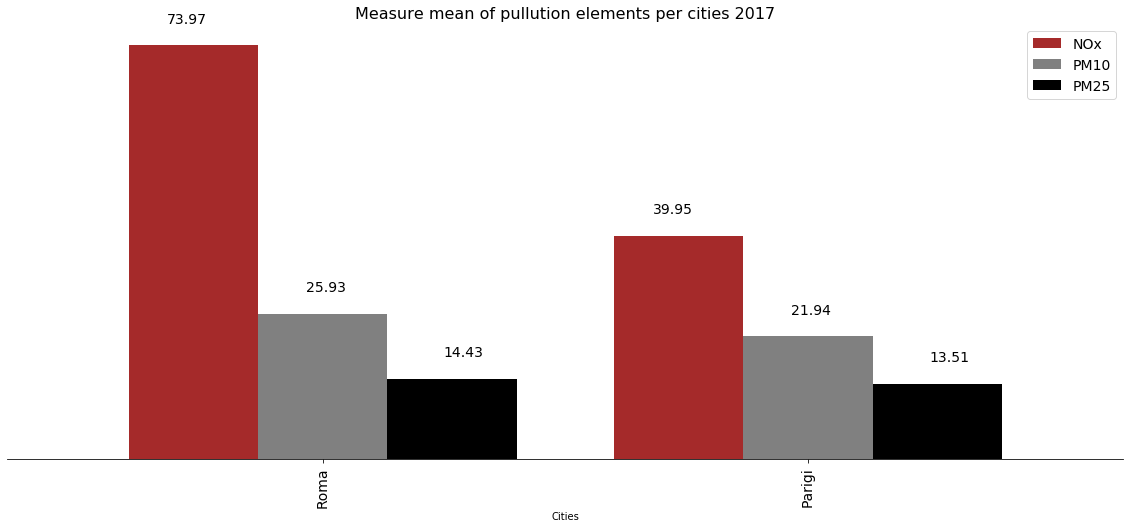

In [210]:
pl= df_mean.plot(kind='bar',
                   color=['brown','gray','black'],
                   figsize=(20, 8),
                   width=0.8)

pl.axes.get_yaxis().set_visible(False)
pl.tick_params(axis='x', labelsize= 14)
plt.legend(fontsize= 14)

for spine in ["left", "top", "right"]:
    pl.spines[spine].set_visible(False)
    pl.spines[spine].set

pl.set_title('Measure mean of pullution elements per cities 2017', fontsize= 16)

for index, valuearr in enumerate(df_mean.values): 
   x_lab= -0.32
   for value in valuearr:
      label= value
      label = format(float(label), '.4')
      plt.annotate(label, xy=(index, value), xytext=(index+x_lab, value+4), color='black', fontsize= 14)
      x_lab+= 0.285

In [78]:
address = 'Piazza del Colosseo, 1,Roma'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

41.8916667 12.492925


In [106]:
search_query = 'Italian Restaurant'
radius = 1000
print(search_query + ' .... OK!')

Italian Restaurant .... OK!


In [115]:
results = requests.get(url).json()

In [116]:
venues = results['response']['venues']

dataframe = json_normalize(venues)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [117]:
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

In [114]:
venues_mapR = folium.Map(location=[latitude, longitude], zoom_start=13)

folium.features.CircleMarker(
    [latitude, longitude],
    radius=12,
    color='red',
    popup='Colosseum',
    fill = True,
    fill_color = 'red',
    fill_opacity = 1
).add_to(venues_mapR)

for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=6,
        color='green',
        popup=label,
        fill = True,
        fill_color='green',
        fill_opacity=0.6
    ).add_to(venues_mapR)

venues_mapR

In [119]:
address = 'Champ de Mars 5,Paris'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

48.85614465 2.297820393322227


In [120]:
search_query = 'French Restaurant'
radius = 1000
print(search_query + ' .... OK!')

French Restaurant .... OK!


In [121]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=IWQ4XASGFOZTTVD1QCA2SSLIX00AFHE0E0SLJSAH442USMIK&client_secret=MAROTLFH1JGE3A3WPAJO2GK5ED2GUQSMVCTX1DDUMT2VBWPZ&ll=48.85614465,2.297820393322227&v=20180604&query=French Restaurant&radius=1000&limit=30'

In [128]:
results = requests.get(url).json()

In [123]:
venues = results['response']['venues']

dataframe = json_normalize(venues)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [124]:
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

In [127]:
venues_mapP = folium.Map(location=[latitude, longitude], zoom_start=13)

folium.features.CircleMarker(
    [latitude, longitude],
    radius=12,
    color='red',
    popup='Tour Eiffel',
    fill = True,
    fill_color = 'red',
    fill_opacity = 1
).add_to(venues_mapP)

for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=6,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_mapP)

venues_mapP